In [2]:
from himanshu_main import modified_vit_model, test_dataset, cifar_processor
import torch
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

/user/ai21btech11011/miniforge3/envs/speech_vision/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


cuda:2
Files already downloaded and verified
Files already downloaded and verified


Files already downloaded and verified
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)


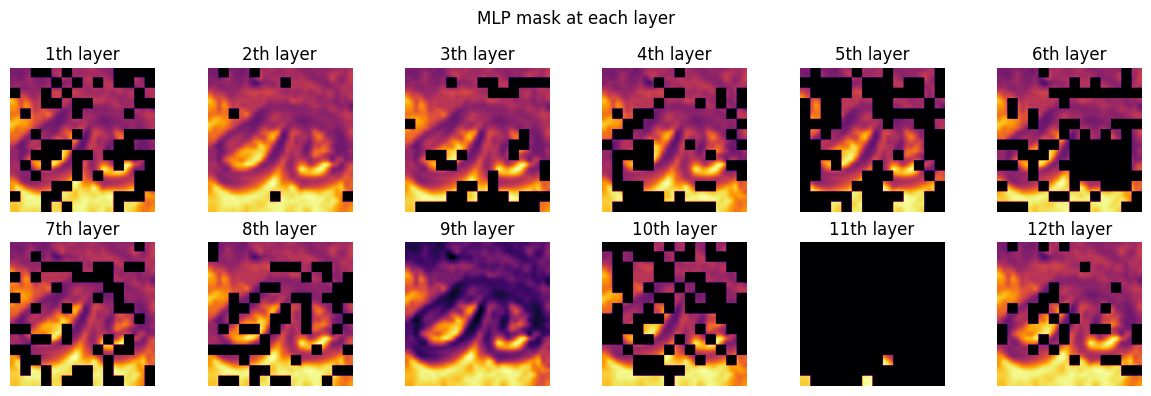

In [ ]:
import numpy as np
import torchvision
import matplotlib.pyplot as plt

data = torchvision.datasets.CIFAR100(root='data', train=False, download=True)[201][0]
inputs = cifar_processor(images=data, return_tensors="pt")['pixel_values']
# input = test_dataset.__getitem__(0)[0]
output = modified_vit_model(inputs.to(device), output_mask=True)
patch_size = 16

bw_image = np.array(data.convert("L").resize((224, 224)))

patches = bw_image.reshape(14, patch_size, 14, patch_size).transpose(0, 2, 1, 3).reshape(-1, patch_size, patch_size)
plt.figure(figsize=(12, 4))
for i, mask in enumerate(output.boolean_masks):
    curr_mask = np.array(mask.to("cpu").squeeze(0)[1:])
    patch = patches.copy()
    print(curr_mask.shape, patch.shape)
    patch[~curr_mask] = 0
    out = patch.reshape(14, 14, patch_size, patch_size).transpose(0, 2, 1, 3).reshape(224, 224)
    plt.subplot(2, 6, i + 1)
    plt.imshow(out, cmap='inferno')
    plt.title(f"{i + 1}th layer")
    plt.axis('off')

plt.suptitle("MLP mask at each layer")
plt.tight_layout()
plt.show()

Files already downloaded and verified
78
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)
(196,) (196, 16, 16)


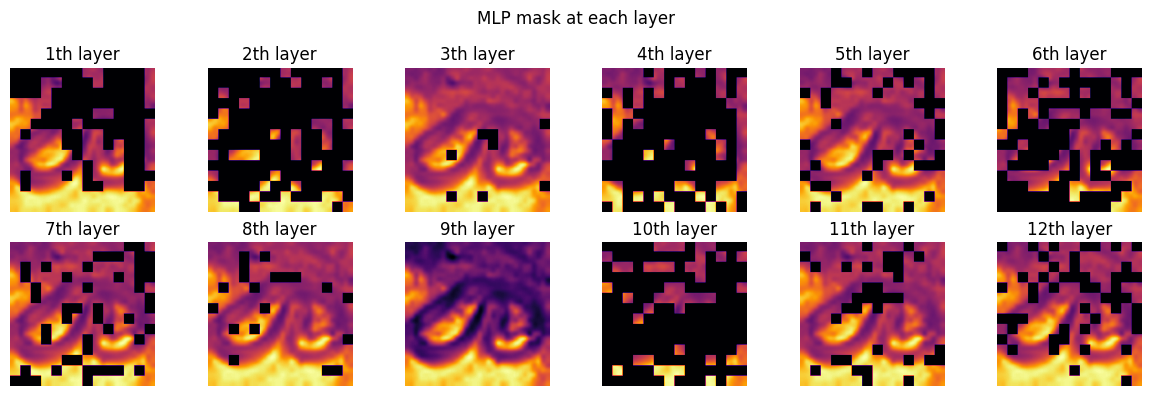

In [3]:
import numpy as np
import torchvision
import matplotlib.pyplot as plt

data = torchvision.datasets.CIFAR100(root='data', train=False, download=True)[201][0]
inputs = cifar_processor(images=data, return_tensors="pt")['pixel_values']
# input = test_dataset.__getitem__(0)[0]
output = modified_vit_model(inputs.to(device), output_mask=True)
patch_size = 16
print(output.logits.argmax(dim=-1).item())

bw_image = np.array(data.convert("L").resize((224, 224)))

patches = bw_image.reshape(14, patch_size, 14, patch_size).transpose(0, 2, 1, 3).reshape(-1, patch_size, patch_size)
plt.figure(figsize=(12, 4))
for i, mask in enumerate(output.boolean_masks):
    curr_mask = np.array(mask.to("cpu").squeeze(0)[1:])
    patch = patches.copy()
    print(curr_mask.shape, patch.shape)
    patch[~curr_mask] = 0
    out = patch.reshape(14, 14, patch_size, patch_size).transpose(0, 2, 1, 3).reshape(224, 224)
    plt.subplot(2, 6, i + 1)
    plt.imshow(out, cmap='inferno')
    plt.title(f"{i + 1}th layer")
    plt.axis('off')

plt.suptitle("MLP mask at each layer")
plt.tight_layout()
plt.show()